In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
data=pd.read_csv('/content/Copy of EndMembers(1).csv', sep=',')

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wavelength (nm)     825 non-null    float64
 1   BC-2-CRMB-5.5       825 non-null    float64
 2   BC-VG40-5.5-CG      825 non-null    float64
 3   BC-VG40-5.5-1T      825 non-null    float64
 4   BC-VG40-6.5         825 non-null    float64
 5   BC-VG40-5.5-1FT     825 non-null    float64
 6   BC-VG40-5.5-FG      825 non-null    float64
 7   BC-VG40-5.5-WC      825 non-null    float64
 8   BC-VG40-5.5-R       825 non-null    float64
 9   BC-VG40-5.5-NC      825 non-null    float64
 10  BC-VG40-4.5         825 non-null    float64
 11  BC-VG40-5.5-1F      825 non-null    float64
 12  BC-VG40-5.5-LTA     825 non-null    float64
 13  BC-VG40-5.5-1T .1   825 non-null    float64
 14  BC-VG40-5.5-1F .1   825 non-null    float64
 15  BC-VG40-5.5-1FT     825 non-null    float64
 16  BC-VG40-

In [ ]:
wavelength=data['Wavelength (nm)']
data.drop(columns=['Wavelength (nm)'], inplace=True)

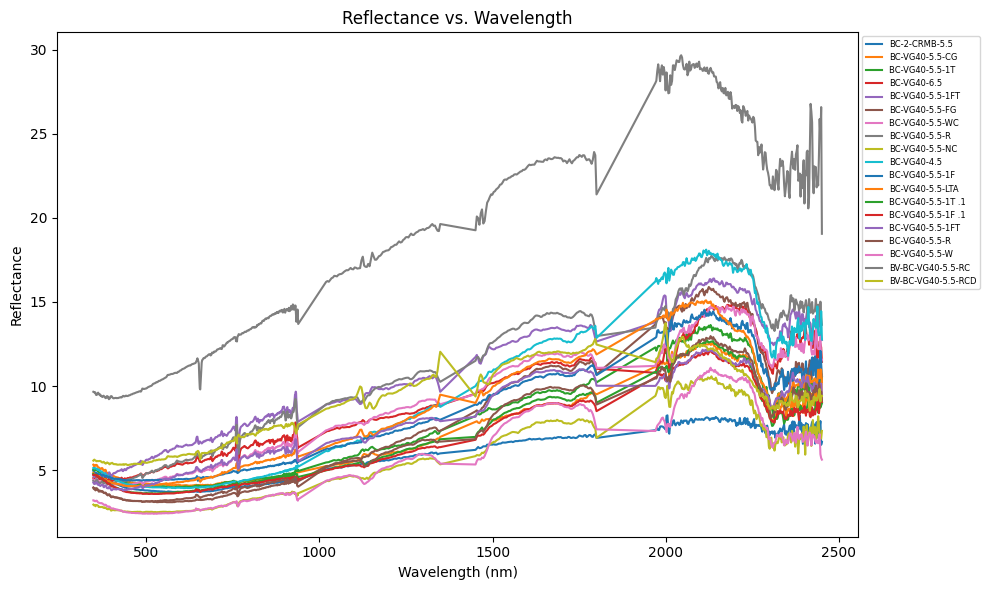

In [ ]:
plt.figure(figsize=(10, 6))

for column in data.columns:
    plt.plot(wavelength, data[column], label=column)

# Add labels, title, and legend
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.title('Reflectance vs. Wavelength')
legend = plt.legend(loc='upper left', fontsize=6,  bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# #Scaling
# from sklearn.preprocessing import MinMaxScaler, StandardScaler

# minmax=StandardScaler()
# intensity_columns = data.columns[1:]

# data[intensity_columns]=minmax.fit_transform(data[intensity_columns])

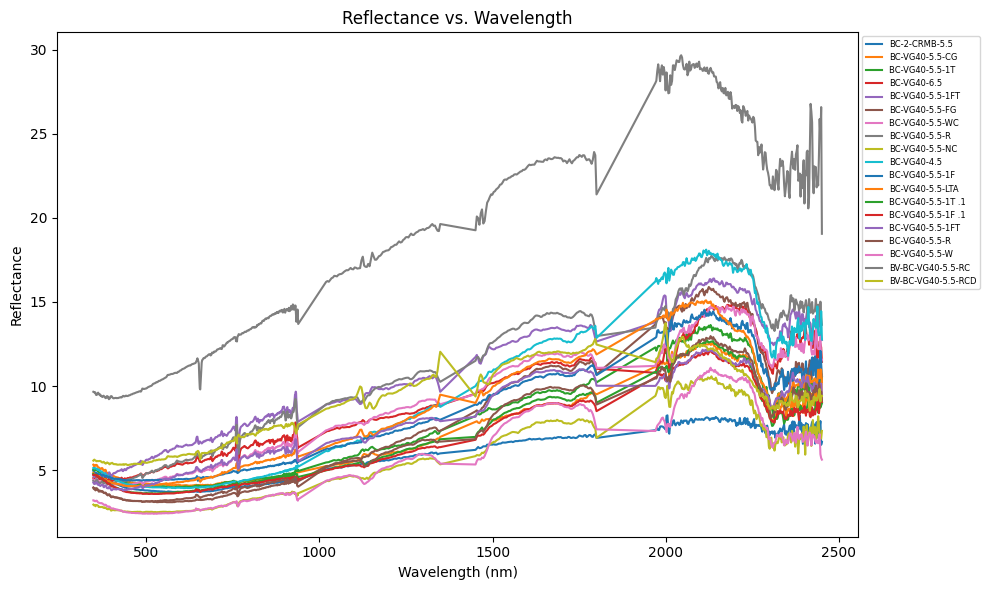

In [ ]:
plt.figure(figsize=(10, 6))

for column in data.columns:
    plt.plot(wavelength, data[column], label=column)

# Add labels, title, and legend
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.title('Reflectance vs. Wavelength')
legend = plt.legend(loc='upper left', fontsize=6,  bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Create a 19x19 matrix of random numbers between 0 and 1
matrix = np.random.rand(19)

print(matrix)

[0.2226054  0.92380207 0.91790899 0.56469722 0.22708277 0.3086027
 0.3235674  0.44629    0.8655875  0.82064865 0.45597523 0.11648608
 0.81063115 0.77307568 0.21480124 0.55834023 0.31489729 0.43059073
 0.41693796]


In [ ]:
# Create a 19x19x800 matrix of zeroes
matrix = np.zeros((19, 19, 825))

for index in data.index:

  row=data.loc[index].to_numpy()

  for i in range(19):
    for j in range(19):
      mat=np.random.rand(1, 19)
      matrix[i][j][index]=np.dot(mat, row)

print(matrix)


[[[ 40.68498521  48.79156939  57.13534982 ... 121.75291121 110.41866081
    97.16851565]
  [ 41.11822816  56.90351804  41.03188278 ... 106.22655302  94.52901135
   110.94006317]
  [ 45.86018945  42.21965916  46.40904846 ... 124.28644657  95.30593632
   103.36732579]
  ...
  [ 45.430761    43.67381613  42.66212774 ... 122.14858212  99.55327575
   118.79577592]
  [ 57.38861325  58.54909333  34.57868219 ...  98.98685684 107.1162499
    88.65064189]
  [ 46.12799397  41.01817591  40.04366482 ... 105.36214345  97.02556929
    88.34384283]]

 [[ 52.25602171  39.48420944  44.97491429 ... 109.32171203  92.93650233
   120.24012494]
  [ 47.2176092   45.01774517  52.88772296 ... 128.80314144  93.70700913
   110.45749747]
  [ 47.35255577  47.98576673  42.91282846 ... 125.60583201 114.74148677
   106.54336098]
  ...
  [ 41.07132829  44.19092725  45.67215147 ...  93.42922111 118.34308929
   118.05768367]
  [ 37.25529909  48.69779064  46.51800337 ... 102.93672394 101.6045715
    95.77908023]
  [ 43.56

In [ ]:
import numpy as np

# Assuming matrix is your 19x19x800 NumPy matrix
height, width, spectral_bands = matrix.shape

# Reshape the matrix to a hyperspectral image
hyperspectral_image = matrix.reshape(height, width, spectral_bands)

# Print the shape of the resulting hyperspectral image
print(hyperspectral_image.shape)

(19, 19, 825)


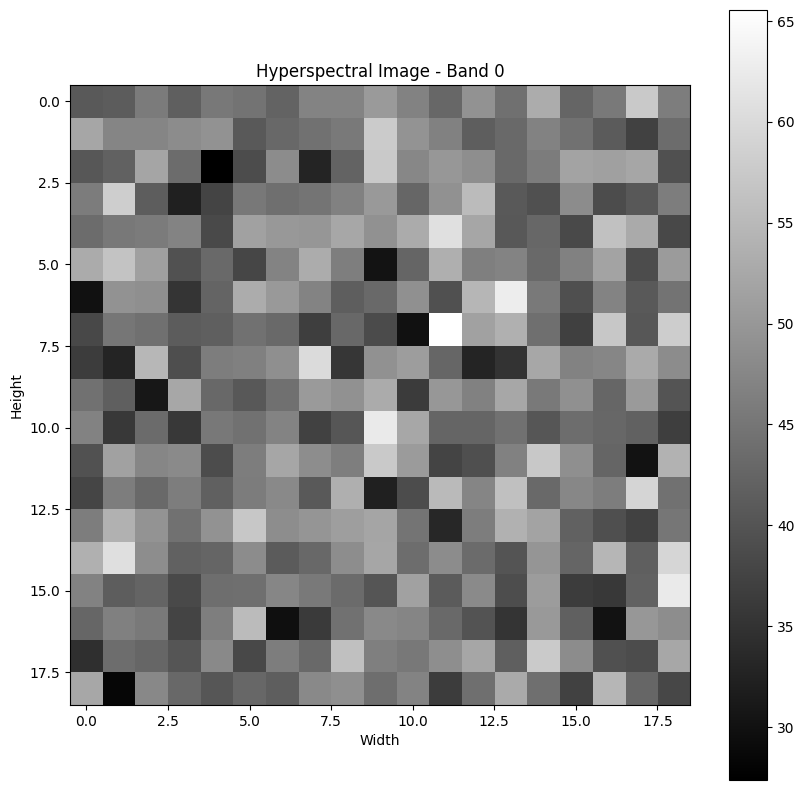

In [ ]:
# Display the hyperspectral image
plt.figure(figsize=(10, 10))  # Set the figure size
plt.imshow(hyperspectral_image[:, :, 0], cmap='gray')  # Display the first spectral band
plt.title('Hyperspectral Image - Band 0')
plt.xlabel('Width')
plt.ylabel('Height')
plt.colorbar()  # Display a colorbar
plt.show()

In [ ]:
# Select 10 bands (adjust the band indices as needed)
selected_bands = hyperspectral_image[:, :, :10]

# Stack the selected bands along the last dimension to create a new array
stacked_bands = np.stack(selected_bands, axis=0)

print(stacked_bands.shape)

(19, 19, 10)


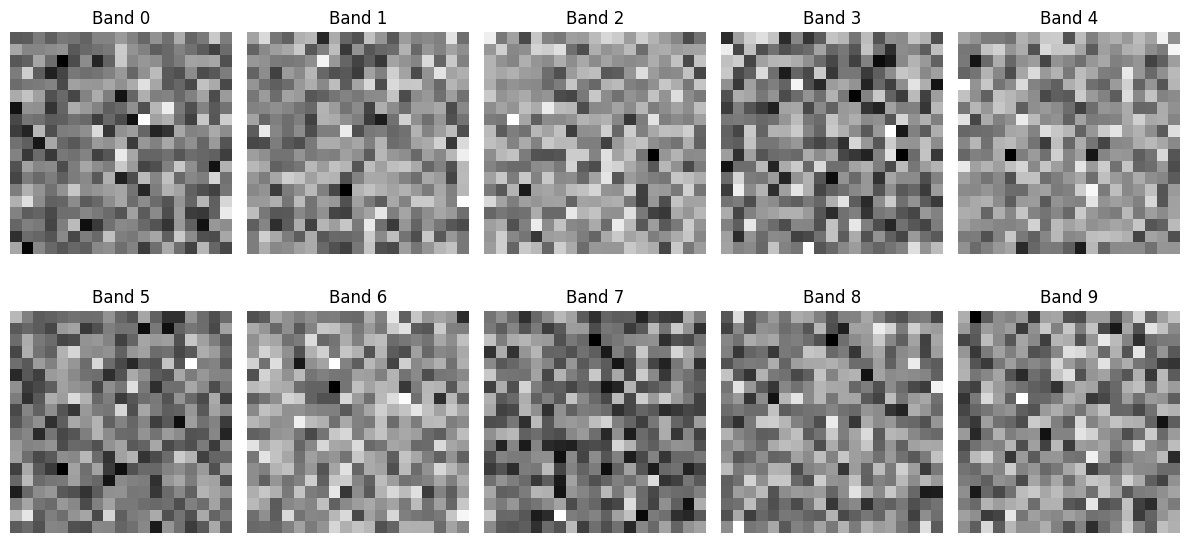

In [ ]:
# Display the stacked bands as an image
plt.figure(figsize=(12, 6))  # Set the figure size

num_channels = stacked_bands.shape[2]
num_rows = 2
num_cols = (num_channels + 1) // 2

# Display each channel as a grayscale image
for channel_index in range(num_channels):
    plt.subplot(num_rows, num_cols, channel_index + 1)  # Create subplots for each channel
    plt.imshow(stacked_bands[:, :, channel_index], cmap='gray')
    plt.title(f'Band {channel_index}')
    plt.axis('off')  # Turn off axis labels

plt.tight_layout()
plt.show()

